In [21]:
# foldes = ["CTU-Honeypot-Capture-4-1", "CTU-Honeypot-Capture-5-1", "CTU-Honeypot-Capture-7-1",
#           "CTU-IoT-Malware-Capture-1-1", "CTU-IoT-Malware-Capture-17-1", "CTU-IoT-Malware-Capture-20-1", 
#           "CTU-IoT-Malware-Capture-21-1", "CTU-IoT-Malware-Capture-3-1", "CTU-IoT-Malware-Capture-33-1",
#           "CTU-IoT-Malware-Capture-34-1", "CTU-IoT-Malware-Capture-35-1", "CTU-IoT-Malware-Capture-36-1", 
#           "CTU-IoT-Malware-Capture-39-1", "CTU-IoT-Malware-Capture-42-1", "CTU-IoT-Malware-Capture-43-1", 
#           "CTU-IoT-Malware-Capture-44-1", "CTU-IoT-Malware-Capture-48-1", "CTU-IoT-Malware-Capture-49-1", 
#           "CTU-IoT-Malware-Capture-52-1", "CTU-IoT-Malware-Capture-60-1", "CTU-IoT-Malware-Capture-7-1", 
#           "CTU-IoT-Malware-Capture-8-1", "CTU-IoT-Malware-Capture-9-1" ]

folders = ["CTU-Honeypot-Capture-4-1", "CTU-Honeypot-Capture-5-1",  "CTU-IoT-Malware-Capture-20-1", 
           "CTU-IoT-Malware-Capture-3-1", "CTU-IoT-Malware-Capture-1-1", "CTU-IoT-Malware-Capture-21-1"]
import pandas as pd

path = "./opt/Malware-Project/BigDataset/IoTScenarios/"
# Định nghĩa tên trường 
column_names = ['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p', 'proto', 'service', 'duration',
                'orig_bytes', 'resp_bytes', 'conn_state', 'local_orig', 'local_resp', 'missed_bytes', 'history', 
                'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'tunnel_parents', 'label', 'detailed-label']
# Khởi tạo dataframe
data = pd.DataFrame()
for folder in folders : 
    PATH = path + folder + "/bro/conn.log.labeled"
    # Đọc file vào DataFrame
    data =  pd.concat([data, pd.read_csv(PATH, sep='\x09|   ', skiprows = 8, header=None, engine= 'python', na_values='-')])

data.columns = column_names
# Hiển thị dữ liệu
data.head()



,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,1540469302.538640,CGm6jB4dXK71ZDWUDh,192.168.1.132,58687.0,216.239.35.4,123.0,udp,NaN,0.114184,48.0,...,NaN,0.0,Dd,1.0,76.0,1.0,76.0,NaN,benign,NaN
1,1540469197.400159,CnaDAG3n5r8eiG4su2,192.168.1.132,1900.0,239.255.255.250,1900.0,udp,NaN,160.367579,7536.0,...,NaN,0.0,D,24.0,8208.0,0.0,0.0,NaN,benign,NaN
2,1540469385.734089,CUrxU238nt0m6yTgKf,192.168.1.132,32893.0,216.239.35.8,123.0,udp,NaN,0.016986,48.0,...,NaN,0.0,Dd,1.0,76.0,1.0,76.0,NaN,benign,NaN
3,1540469831.302625,CGQf8t1kjdxB5PHXL4,192.168.1.132,53395.0,2.16.60.82,443.0,tcp,NaN,0.003497,0.0,...,NaN,0.0,ShAFf,5.0,212.0,3.0,144.0,NaN,benign,NaN
4,1540469831.265405,CUo9DH2QDnCaBIGjkg,192.168.1.132,52801.0,192.168.1.1,53.0,udp,dns,0.036724,34.0,...,NaN,0.0,Dd,1.0,62.0,1.0,339.0,NaN,benign,NaN


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1173178 entries, 0 to 3286
Data columns (total 23 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   ts              1173178 non-null  object 
 1   uid             1173178 non-null  object 
 2   id.orig_h       1173174 non-null  object 
 3   id.orig_p       1173172 non-null  float64
 4   id.resp_h       1173172 non-null  object 
 5   id.resp_p       1173172 non-null  float64
 6   proto           1173172 non-null  object 
 7   service         12832 non-null    object 
 8   duration        300583 non-null   float64
 9   orig_bytes      300583 non-null   float64
 10  resp_bytes      300583 non-null   float64
 11  conn_state      1173172 non-null  object 
 12  local_orig      0 non-null        float64
 13  local_resp      0 non-null        float64
 14  missed_bytes    1173172 non-null  float64
 15  history         1154457 non-null  object 
 16  orig_pkts       1173172 non-null  float64
 1

In [23]:
data = data.drop(data[data['ts'] == "#close"].index)
data['ts'] = data['ts'].astype(float)

In [24]:
data["label"].value_counts()

label
Malicious    691065
Benign       480267
benign         1825
Name: count, dtype: int64

In [25]:
# Thay thế các giá trị benign -> 0
# Thay thế các giá trị Malicious -> 1
data['label'] = data['label'].replace(['Benign', 'benign'], 0)
data['label'] = data['label'].replace(['Malicious'], 1)
# Xóa 1 số trường không có nhiều giá trị
data = data.drop(['ts','uid','id.orig_h','id.orig_p','id.resp_h','id.resp_p','local_orig','local_resp','detailed-label', 'tunnel_parents'], axis= 1)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1173157 entries, 0 to 3285
Data columns (total 11 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   proto          1173157 non-null  object 
 1   duration       300575 non-null   float64
 2   orig_bytes     300575 non-null   float64
 3   resp_bytes     300575 non-null   float64
 4   conn_state     1173157 non-null  object 
 5   missed_bytes   1173157 non-null  float64
 6   orig_pkts      1173157 non-null  float64
 7   orig_ip_bytes  1173157 non-null  float64
 8   resp_pkts      1173157 non-null  float64
 9   resp_ip_bytes  1173157 non-null  float64
 10  label          1173157 non-null  int64  
dtypes: float64(8), int64(1), object(2)
memory usage: 107.4+ MB


In [27]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['proto'] = data['proto'].astype(str)
data['proto'] = encoder.fit_transform(data['proto'])

In [28]:
encoder = LabelEncoder()
data['conn_state'] = data['conn_state'].astype(str)
data['conn_state'] = encoder.fit_transform(data['conn_state'])

In [ ]:
encoder = LabelEncoder()
data['history'] = data['history'].astype(str)
data['history'] = encoder.fit_transform(data['history'])

In [38]:
encoder = LabelEncoder()
data['service'] = data['service'].astype(str)
data['service'] = encoder.fit_transform(data['service'])

KeyError: 'service'

In [29]:
median_duration = data["duration"].median()  
data["duration"].fillna(median_duration, inplace=True)

In [30]:
median_orig_bytes = data["orig_bytes"].median()  
data["orig_bytes"].fillna(median_orig_bytes, inplace=True)

In [31]:
median_resp_bytes = data["resp_bytes"].median()  
data["resp_bytes"].fillna(median_resp_bytes, inplace=True)


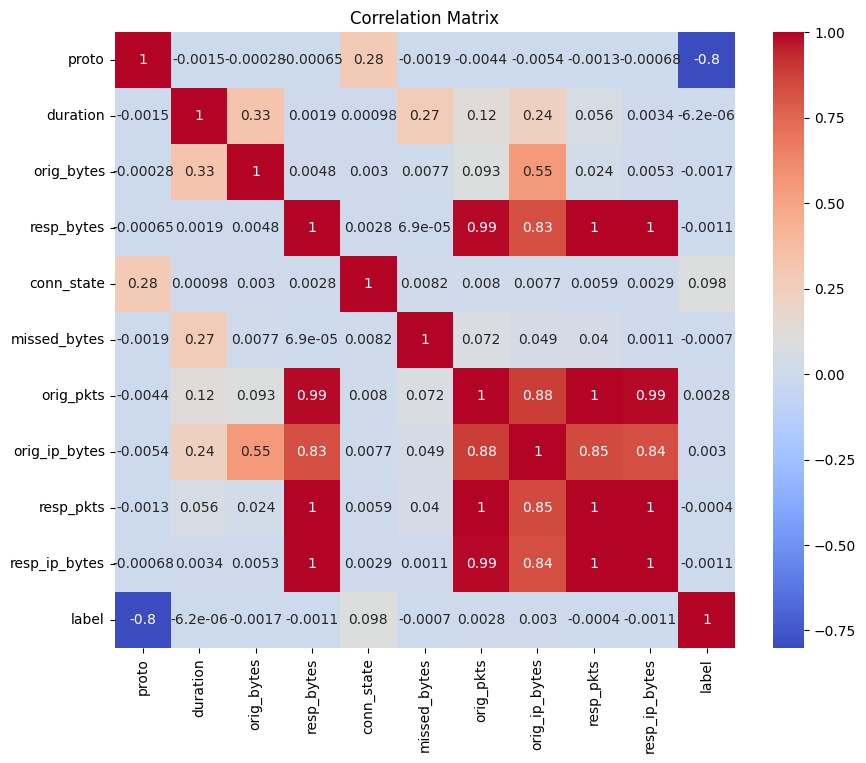

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tính ma trận tương quan
corr_matrix = data.corr()

# Vẽ biểu đồ ma trận tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [33]:
x = data.drop( ['label'], axis=1)
y = data['label']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [34]:
data.nunique()

proto                3
duration         37575
orig_bytes         363
resp_bytes         671
conn_state          13
missed_bytes        10
orig_pkts           81
orig_ip_bytes     1496
resp_pkts           86
resp_ip_bytes     1594
label                2
dtype: int64

In [35]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
xgb_clf = XGBClassifier(
    max_depth=5,  # Độ sâu tối đa của cây quyết định
    learning_rate=0.01,  # Tốc độ học
    n_estimators=500,  # Số lượng cây
)
xgb_clf.fit(x_train, y_train)
y_pred = xgb_clf.predict(x_test)


In [36]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9605723004534761


In [37]:
# from sklearn.model_selection import GridSearchCV
# params = {'max_depth': list(range(3, 10)), 'learning_rate': [0.05, 0.06], 'n_estimators':[500, 600, 700]  }
# grid_search_cv = GridSearchCV(estimator = XGBClassifier(random_state=42),param_grid = params, cv=3)
# grid_search_cv.fit(x_train, y_train)